##  Finding the Best Two Markets to Advertise In

** we're working for an an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to promote our product and we'd like to invest some money in advertisement.** 

** Our goal in this project is to find out the two best markets to advertise our product in. **


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
market = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)

In [3]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


In [4]:
print(market.shape)
market.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


** We'd like to know: **


** 1. Where are these new coders located. **


** 2. What are the locations with the greatest number of new coders.
** 


** 3. How much money new coders are willing to spend on learning.** 

** Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. **

In [5]:
market["JobRoleInterest"].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                

In [6]:
no_null = market["JobRoleInterest"].dropna()
splitted = no_null.str.split(",")

1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: JobRoleInterest, dtype: float64


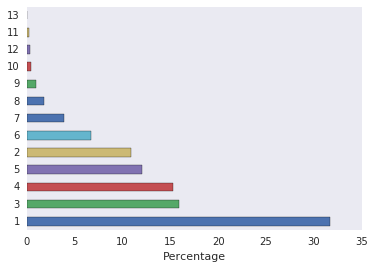

In [7]:
data = splitted.apply(lambda x: len(x)).value_counts(normalize = True) * 100
data.plot.barh(grid = False)
plt.xlabel("Percentage")
print(data)


It turns out that only 31.7% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


(0, 100)

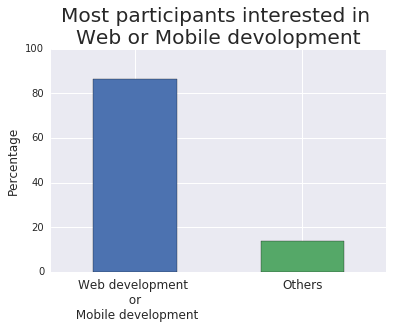

In [8]:
web_or_mobile = no_null.str.contains("Web Developer|Mobile Developer")

freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

freq_table.plot.bar()
plt.style.use("fivethirtyeight")
plt.title("Most participants interested in \nWeb or Mobile devolopment")
plt.xticks([0,1],["Web development \n or \n Mobile development","Others"],fontsize = 12,rotation = 0)
plt.ylabel('Percentage', fontsize = 12)
plt.ylim([0,100])

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

Now we need to figure out what are the best markets to invest money in for advertising our courses. We'd like to know:

** 1. Where are these new coders located. **

**   2. What are the locations with the greatest number of new coders.**


**   3. How much money new coders are willing to spend on learning.**

## New Coders - Locations and Densities

In [9]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

live = market[market["JobRoleInterest"].notnull()].copy()
ab  = live["CountryLive"].value_counts()
feq = live["CountryLive"].value_counts(normalize = True) * 100

data = pd. DataFrame({"Absolute frequency": ab, "Percentage ": feq})
display(data)

,Absolute frequency,Percentage
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


45.7% of our potential customers are located in the US, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.7%, which is not too far from the United Kingdom (4.6%) or Canada (3.8%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

## Spending Money for Learning

In [10]:
live["MonthsProgramming"].replace(0,1, inplace = True)
live["Spent per month"] = live["MoneyForLearning"]/live["MonthsProgramming"]

In [11]:
live["Spent per month"].value_counts()

0.000000        3092
50.000000        128
25.000000        120
16.666667        118
100.000000       118
33.333333        109
8.333333         105
20.000000         88
10.000000         83
83.333333         80
166.666667        67
12.500000         66
4.166667          65
5.000000          62
200.000000        53
500.000000        50
66.666667         47
41.666667         46
250.000000        44
1000.000000       43
3.333333          38
20.833333         37
125.000000        36
6.666667          35
2.500000          33
333.333333        31
5.555556          31
150.000000        31
11.111111         31
30.000000         28
                ... 
6.187500           1
121.428571         1
0.222222           1
1566.666667        1
2.714286           1
4.615385           1
2.692308           1
3500.000000        1
0.103448           1
1066.666667        1
71.000000          1
52.500000          1
137.500000         1
87.500000          1
1228.571429        1
40000.000000       1
56.333333    

In [12]:
live.head()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spent per month
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,200.000000
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.000000
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
6,29.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


In [13]:
live["Spent per month"].isnull().sum()

675

In [14]:
live = live[live["Spent per month"].notnull()]

In [15]:
live = live[live["CountryLive"].notnull()]

In [16]:
group_country_mean = live.groupby(by = "CountryLive").mean()
frequency = group_country_mean["Spent per month"][["United States of America","India","United Kingdom","Canada"]]
print(frequency)

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Spent per month, dtype: float64


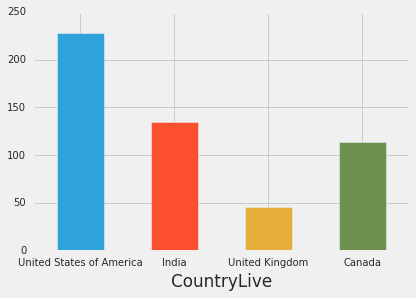

In [17]:
frequency.plot.bar(rot = 0)
plt.show()

The results for the United Kingdom and Canada are a bit surprising relative to the values we see for India. If we considered a few socio-economical metrics (like [GDP per capita](https://bit.ly/2I3cukh)), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom and Canada, or we have some outliers (maybe coming from wrong survey answers) making the mean too large for India, or too low for the UK and Canada. Or it might be that the results are correct.

## Dealing with Extreme Outliers

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



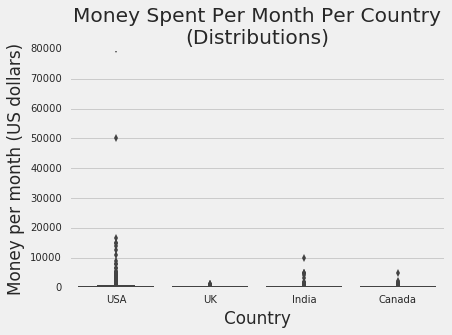

In [18]:
only_4 = live[live['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = "CountryLive", y = "Spent per month", data = only_4)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.xticks([0,1,2,3],["USA", "UK","India", "Canada"])
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month \$50000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over \$20,000 per month.

In [19]:
live = live[live["Spent per month"] < 20000]

In [20]:
grouped = live.groupby("CountryLive").mean()
refeq = grouped["Spent per month"][["United States of America","India","United Kingdom","Canada"]]
print(refeq)

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Spent per month, dtype: float64


([<matplotlib.axis.XTick at 0x7f32f3b8d3c8>,
 <a list of 4 Text xticklabel objects>)

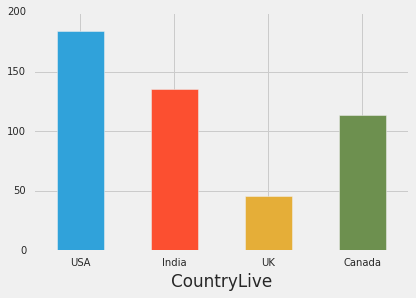

In [21]:
refeq.plot.bar(rot = 0)
plt.xticks(range(4),["USA","India","UK","Canada"])

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



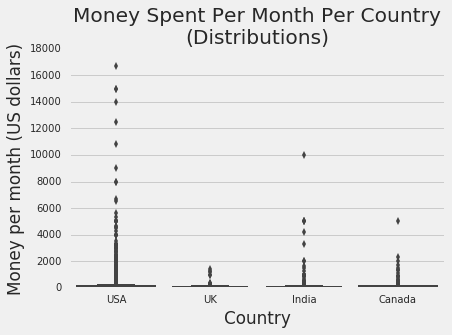

In [22]:
only_4 = live[live['CountryLive'].str.contains(
    'United States of America|India|United Kingdom|Canada')]

sns.boxplot(x = "CountryLive", y = "Spent per month", data = only_4)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.xticks([0,1,2,3],["USA", "UK","India", "Canada"])
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.show()

We can see a few extreme outliers for India (values over \$2500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [36]:
india_outliers = only_4[(only_4["CountryLive"] == "India") & (only_4["Spent per month"] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spent per month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [43]:
only_4 = only_4.drop(india_outliers.index)


It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was "Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?", so they might have misunderstood and thought university tuition is included. It seems safer to remove these two rows.

In [44]:
usa_outliers = only_4[(only_4["CountryLive"] == "United States of America") & (only_4["Spent per month"] >= 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spent per month



Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend \$6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

** 1. Didn't attend bootcamps. **


** 2. Had been programming for three months or less when at the time they completed the survey.**

In [45]:
# Remove the respondents who didn't attendent a bootcamp
no_bootcamp = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['Spent per month'] >= 6000) &
    (only_4['AttendedBootcamp'] == 0)
]

only_4 = only_4.drop(no_bootcamp.index)


# Remove the respondents that had been programming for less than 3 months
less_than_3_months = only_4[
    (only_4['CountryLive'] == 'United States of America') & 
    (only_4['Spent per month'] >= 6000) &
    (only_4['MonthsProgramming'] <= 3)
]

only_4 = only_4.drop(less_than_3_months.index)

In [46]:
# Examine the extreme outliers for Canada
canada_outliers = only_4[
    (only_4['CountryLive'] == 'Canada') & 
    (only_4['Spent per month'] > 4500)]

canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Spent per month


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [47]:
# Remove the extreme outliers for Canada
only_4 = only_4.drop(canada_outliers.index)

In [48]:
only_4.groupby('CountryLive').mean()['Spent per month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Spent per month, dtype: float64

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



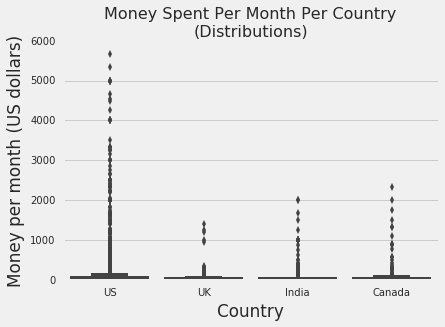

In [50]:
sns.boxplot(y = 'Spent per month', x = 'CountryLive',
            data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()


## Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly \$143).

We sell subscriptions at a price of \$59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly \$93 per month, compared to India (\$66) and the United Kingdom (\$45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [51]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.